In [18]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import cv2
import numpy as np
import PIL
import io
import html
import time
from PIL import Image
import torch
import pathlib

In [19]:
# Importing Libraries
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random

In [20]:
# Importing Library for Data Visualization
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing Tensorflow for model creation and its dependencies
import tensorflow

In [ ]:
# Generate batches of tensor image data with real-time data augmentation.
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# for enabling inline plotting
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/107.7 GB disk)


In [ ]:
model = YOLO('/content/drive/MyDrive/PFE/Detection Model/Training results/Detection/weights/best.pt')

In [ ]:
classifier=tensorflow.keras.models.load_model('/content/drive/MyDrive/PFE/Classification model/Classifier.h5')

In [21]:
!yolo mode=predict model='/content/drive/MyDrive/PFE/Detection Model/Training results/Detection/weights/best.pt' conf=0.25 source='/content/drive/MyDrive/PFE/Classification model/Test Images/img7.jpeg'

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/PFE/Classification model/Test Images/img7.jpeg: 800x800 1 strawberry, 372.1ms
Speed: 35.4ms preprocess, 372.1ms inference, 2556.1ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


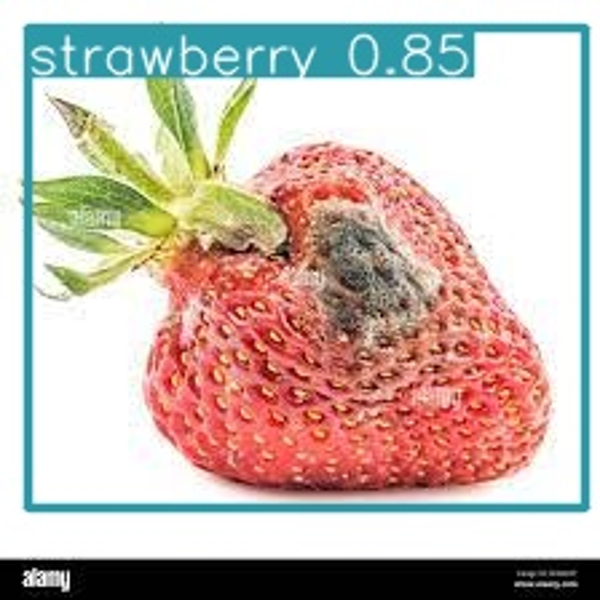

In [22]:
image = Image.open('runs/detect/predict2/img7.jpeg')

display(image.resize((600, 600)))

In [23]:
from keras.preprocessing import image
testImage='runs/detect/predict2/img7.jpeg'
test_image=image.load_img(testImage,target_size=(128, 128))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)

1/1 [==============================] - 0s 372ms/step


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/PFE/Classification model/Test Images/img7.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (11, 11), 0)
canny = cv2.Canny(blur, 30, 150, 3)
dilated = cv2.dilate(canny, (1, 1), iterations=0)

(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)


print("count: ", len(cnt))

count:  22


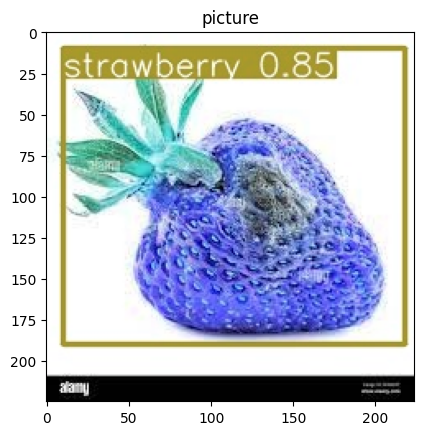

Quality is:  Rotten


In [ ]:
img=cv2.imread(testImage)
plt.imshow(img)
plt.title('picture')
plt.show()

if np.argmax(result)==0:
  qlty = 'Fresh'
else:
  qlty = 'Rotten'

print('Quality is: ',qlty)